In [1]:
import numpy as np
import pandas as pd
import adaboost
import utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

IndentationError: expected an indented block (adaboost.py, line 78)

In [ ]:
data = pd.read_csv("data/spambase.data.shuffled", header=None)
Y_index = 57
data["Y"] = np.where(data[Y_index] == 0, -1, 1)
data = data.drop(Y_index, 1)
data[data.drop("Y", 1).columns.values] = scale(data[data.drop("Y", 1).columns.values])
X_train, X_test, y_train, y_test = train_test_split(data.drop("Y", 1), data["Y"], test_size=0.33)

1 fold ...
1 fold ...
1 fold ...
1 fold ...
1 fold ...


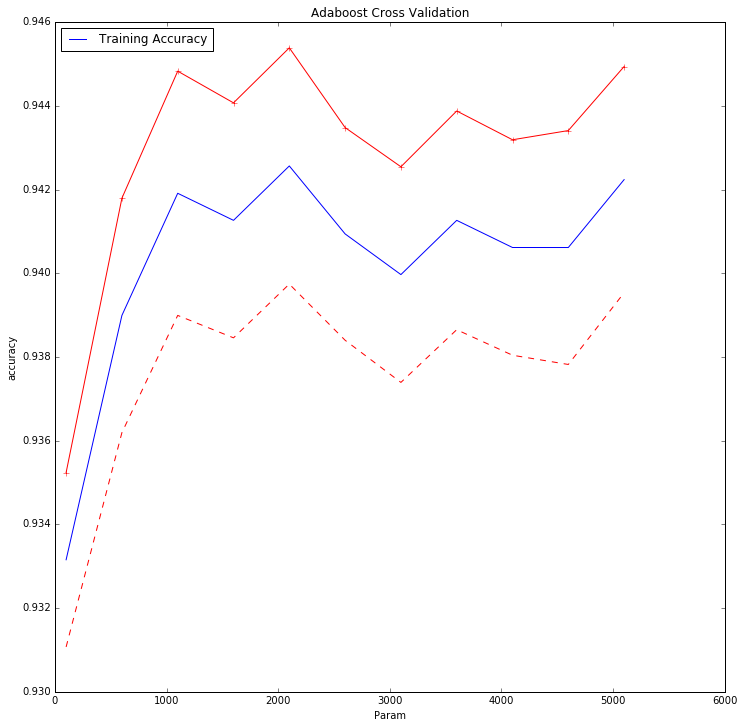

In [9]:
# Cross validate Adaboost
reload(adaboost)
Ts = [100 * i for i in range(1, 52, 5)]
fold_results_train = {}
for T in Ts:
    fold_results_train[T] = []

kf = KFold(n = X_train.shape[0], n_folds=5, shuffle=True)

for train_index, test_index in kf:
    print "1 fold ..."
    my_adaboost = adaboost.Adaboost(Ts[-1])
    index_dic = X_train.index.values
    train_index, test_index = index_dic[train_index], index_dic[test_index]
    my_adaboost.fit(X_train.ix[train_index], y_train[train_index])
    for T in Ts:
        fold_results_train[T] += [my_adaboost.score(X_train.ix[test_index], y_train[test_index], T)]

utils.plot_cross_validation_curve(fold_results_train, Ts, "Adaboost", False, False)

In [ ]:
# Cross validate Adaboost
reload(adaboost)
Ts = [100 * i for i in range(1, 52, 5)]
fold_results_train = {}
for T in Ts:
    fold_results_train[T] = []

kf = KFold(n = X_train.shape[0], n_folds=5, shuffle=True)

for train_index, test_index in kf:
    print "1 fold ..."
    my_adaboost = adaboost.Adaboost(Ts[-1], 1, 1, 1)
    index_dic = X_train.index.values
    train_index, test_index = index_dic[train_index], index_dic[test_index]
    my_adaboost.fit(X_train.ix[train_index], y_train[train_index])
    for T in Ts:
        fold_results_train[T] += [my_adaboost.score(X_train.ix[test_index], y_train[test_index], T)]

utils.plot_cross_validation_curve(fold_results_train, Ts, "Adaboost", False, False)

In [13]:
# Adaboost Normal
T = 1000
my_adaboost = adaboost.Adaboost(T)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0533245556287


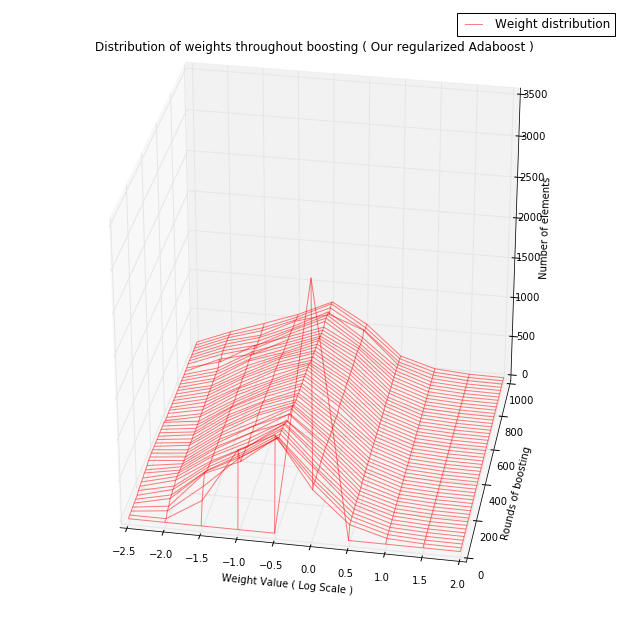

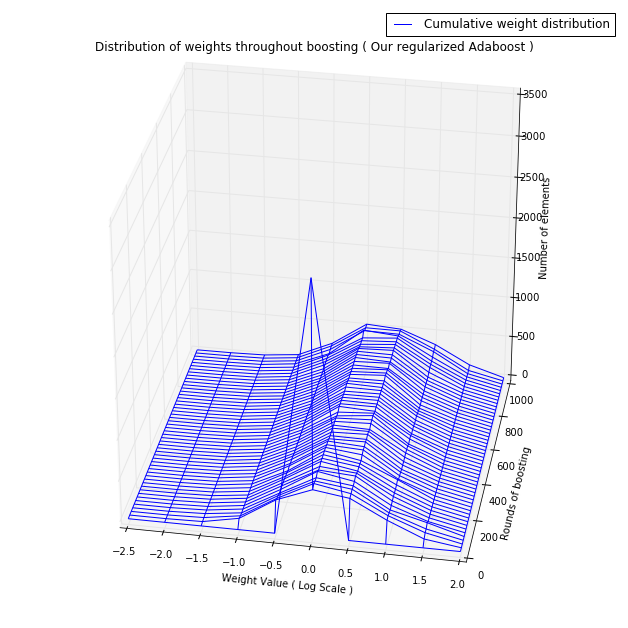

In [15]:
X, Y, Z1, Z2 = [], [], [], []

for i in range(0, D.shape[0], D.shape[0] / 50 ):
    hist, bin_edge = np.histogram(np.log10(D[i] / D[0]), bins=[a*1.0/2 for a in range(-5, 6)])   
    L1, L2, L3, L4 = [], [], [], []
    for j in range(hist.shape[0]):
        L1 += [i]
        L2 += [bin_edge[j]]
        L3 += [hist[j] * 10 ** bin_edge[j]]
        L4 += [hist[j]]
    X += [L1]
    Y += [L2]
    Z1 += [L3]
    Z2 += [L4]

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z2, rstride=1, cstride=1, color='r', alpha=0.5, label="Weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z1, rstride=1, cstride=1, color='b', label="Cumulative weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

In [16]:
# Adaboost Regularized paper
T = 1000
my_adaboost = adaboost.Adaboost(T, 2, 10, 0)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0520078999342


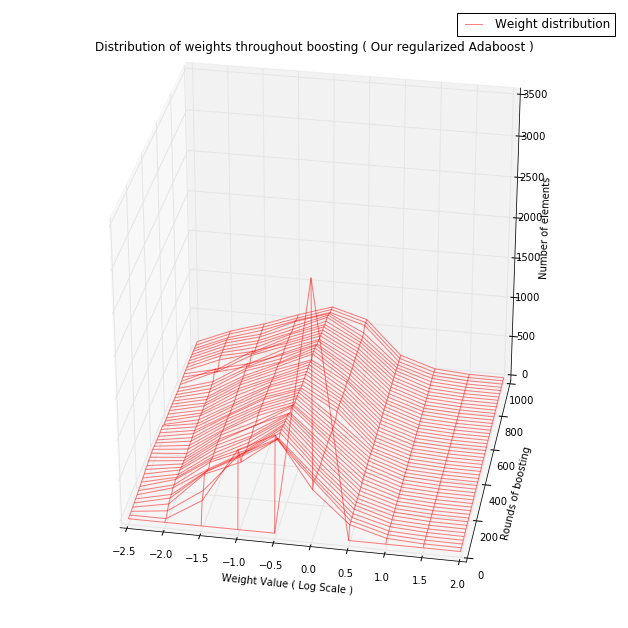

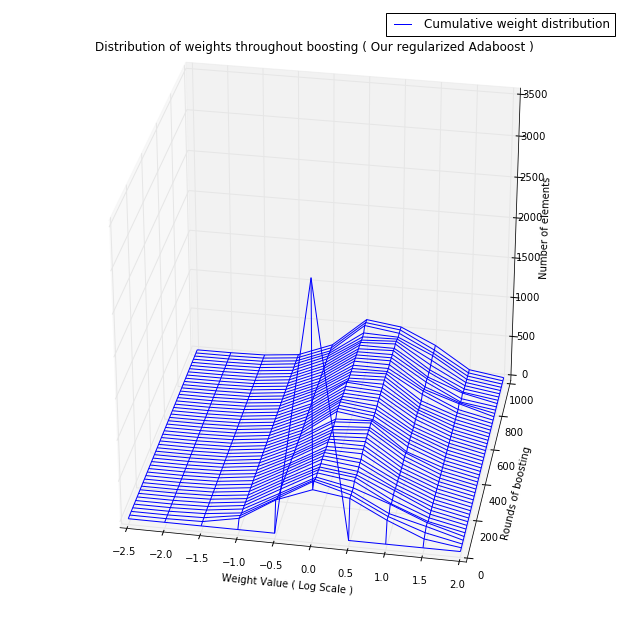

In [17]:
X, Y, Z1, Z2 = [], [], [], []

for i in range(0, D.shape[0], D.shape[0] / 50 ):
    hist, bin_edge = np.histogram(np.log10(D[i] / D[0]), bins=[a*1.0/2 for a in range(-5, 6)])   
    L1, L2, L3, L4 = [], [], [], []
    for j in range(hist.shape[0]):
        L1 += [i]
        L2 += [bin_edge[j]]
        L3 += [hist[j] * 10 ** bin_edge[j]]
        L4 += [hist[j]]
    X += [L1]
    Y += [L2]
    Z1 += [L3]
    Z2 += [L4]

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z2, rstride=1, cstride=1, color='r', alpha=0.5, label="Weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z1, rstride=1, cstride=1, color='b', label="Cumulative weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

In [18]:
# Adaboost Regularized v1 (ours)
T = 1000
my_adaboost = adaboost.Adaboost(T, 2, 10, 1)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0473996050033


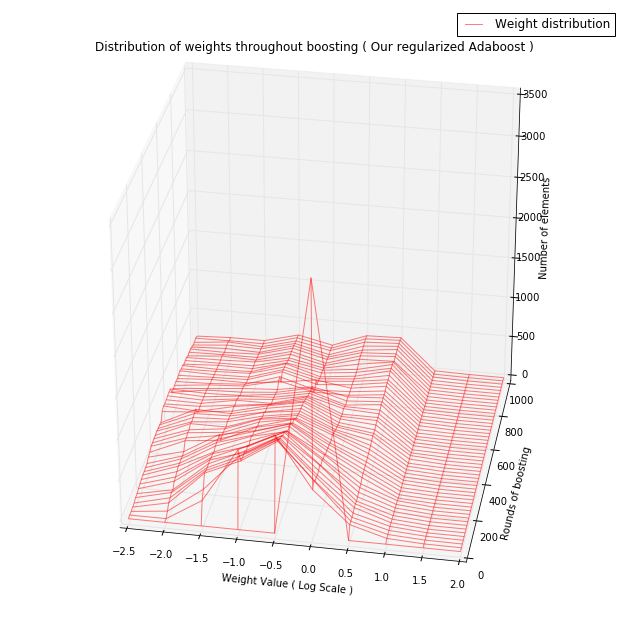

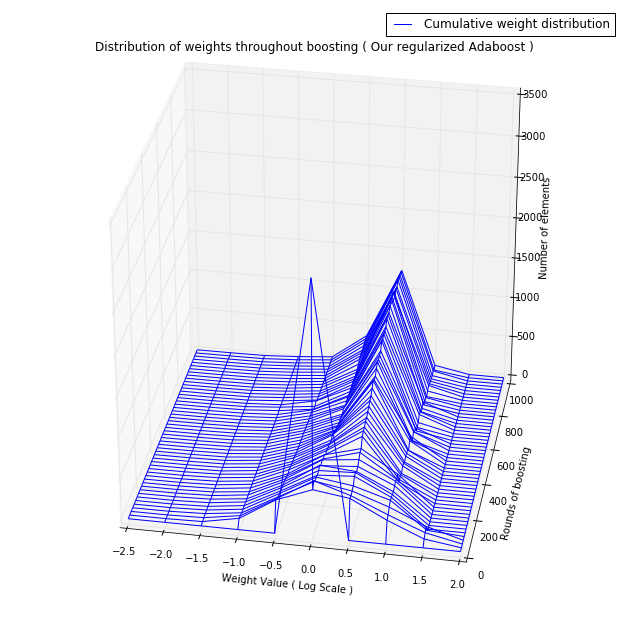

In [19]:
X, Y, Z1, Z2 = [], [], [], []

for i in range(0, D.shape[0], D.shape[0] / 50 ):
    hist, bin_edge = np.histogram(np.log10(D[i] / D[0]), bins=[a*1.0/2 for a in range(-5, 6)])   
    L1, L2, L3, L4 = [], [], [], []
    for j in range(hist.shape[0]):
        L1 += [i]
        L2 += [bin_edge[j]]
        L3 += [hist[j] * 10 ** bin_edge[j]]
        L4 += [hist[j]]
    X += [L1]
    Y += [L2]
    Z1 += [L3]
    Z2 += [L4]

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z2, rstride=1, cstride=1, color='r', alpha=0.5, label="Weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z1, rstride=1, cstride=1, color='b', label="Cumulative weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

In [20]:
# Adaboost Regularized v1 (ours)
T = 1000
my_adaboost = adaboost.Adaboost(T, 3, 10, 1)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0454246214615


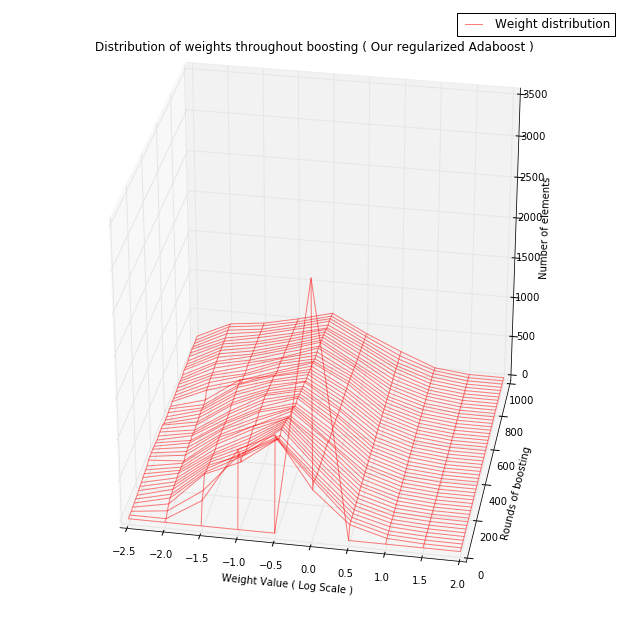

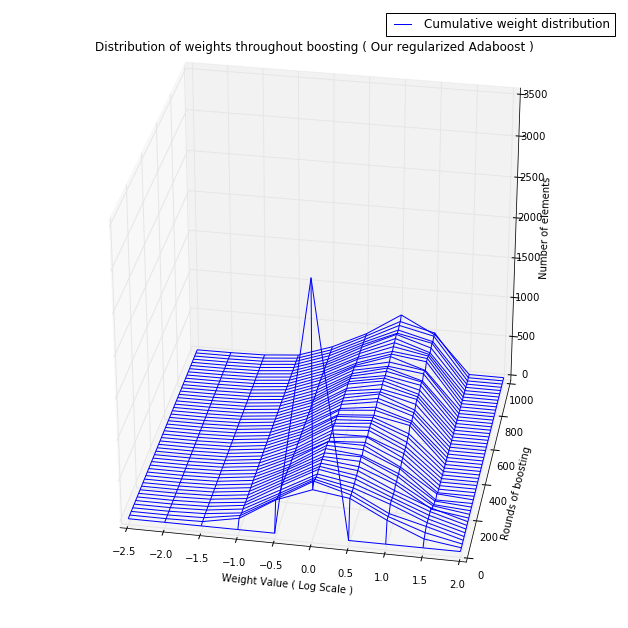

In [21]:
X, Y, Z1, Z2 = [], [], [], []

for i in range(0, D.shape[0], D.shape[0] / 50 ):
    hist, bin_edge = np.histogram(np.log10(D[i] / D[0]), bins=[a*1.0/2 for a in range(-5, 6)])   
    L1, L2, L3, L4 = [], [], [], []
    for j in range(hist.shape[0]):
        L1 += [i]
        L2 += [bin_edge[j]]
        L3 += [hist[j] * 10 ** bin_edge[j]]
        L4 += [hist[j]]
    X += [L1]
    Y += [L2]
    Z1 += [L3]
    Z2 += [L4]

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z2, rstride=1, cstride=1, color='r', alpha=0.5, label="Weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z1, rstride=1, cstride=1, color='b', label="Cumulative weight distribution")
ax.view_init(30, -80)
ax.set_xlabel("Weight Value ( Log Scale )")
ax.set_ylabel("Rounds of boosting")
ax.set_zlabel("Number of elements")
ax.set_title("Distribution of weights throughout boosting ( Our regularized Adaboost )")
ax.legend()

plt.show()

Let's look at a better View : How many weight are necessary to have 50 % of the cumulative weights ?

In [39]:
# Adaboost Normal
T = 10000
my_adaboost = adaboost.Adaboost(T)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0592495062541


(10001, 3082)


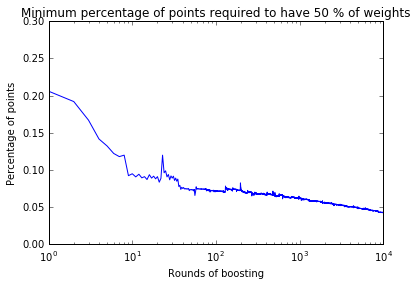

In [40]:
Ts, Percentages = [], []

print D.shape

for i in range(D.shape[0]):
    WeightsOrdered = -np.sort(-D[i])
    cumulWeight = 0
    nb = 0
    for weight in WeightsOrdered:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Ts += [i]
    Percentages += [nb * 1.0 / D.shape[1]]

plt.title("Minimum percentage of points required to have 50 % of weights")
plt.xlabel("Rounds of boosting")
plt.ylabel("Percentage of points")
plt.ylim([0, 0.3])
plt.semilogx(Ts, Percentages)

In [50]:
# Adaboost Regularized paper
T = 10000
my_adaboost10 = adaboost.Adaboost(T, 2, 10, 0)
my_adaboost1 = adaboost.Adaboost(T, 2, 1, 0)
my_adaboost01 = adaboost.Adaboost(T, 2, 0.1, 0)
D10 = my_adaboost10.fit(X_train, y_train)
D1 = my_adaboost1.fit(X_train, y_train)
D01 = my_adaboost01.fit(X_train, y_train)
print "Error testing 10 : {0}".format(my_adaboost10.error(X_test, y_test, T))
print "Error testing 1 : {0}".format(my_adaboost1.error(X_test, y_test, T))
print "Error testing  0.1 : {0}".format(my_adaboost01.error(X_test, y_test, T))

Error testing 10 : 0.0585911784068
Error testing 1 : 0.0592495062541
Error testing  0.1 : 0.0579328505596


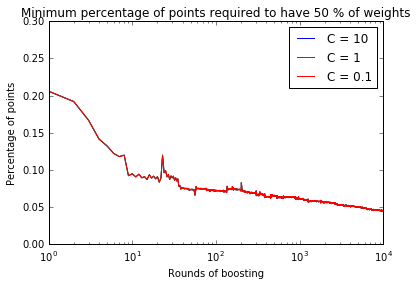

In [53]:
Ts, Percentages10, Percentages1, Percentages01 = [], [], [], []

for i in range(D.shape[0]):
    WeightsOrdered10 = -np.sort(-D10[i])
    WeightsOrdered1 = -np.sort(-D1[i])
    WeightsOrdered01 = -np.sort(-D01[i])
    
    Ts += [i]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered10:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages10 += [nb * 1.0 / D10.shape[1]]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered1:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages1 += [nb * 1.0 / D1.shape[1]]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered01:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages01 += [nb * 1.0 / D01.shape[1]]

plt.title("Minimum percentage of points required to have 50 % of weights")
plt.xlabel("Rounds of boosting")
plt.ylabel("Percentage of points")
plt.ylim([0, 0.3])
plt.semilogx(Ts, Percentages10, label="C = 10")
plt.semilogx(Ts, Percentages10, label="C = 1")
plt.semilogx(Ts, Percentages10, label="C = 0.1")
plt.legend()

In [54]:
# Adaboost New Version
T = 10000
my_adaboost10 = adaboost.Adaboost(T, 2, 10, 1)
my_adaboost1 = adaboost.Adaboost(T, 2, 1, 1)
my_adaboost01 = adaboost.Adaboost(T, 2, 0.1, 1)
D10 = my_adaboost10.fit(X_train, y_train)
D1 = my_adaboost1.fit(X_train, y_train)
D01 = my_adaboost01.fit(X_train, y_train)
print "Error testing 10 : {0}".format(my_adaboost10.error(X_test, y_test, T))
print "Error testing 1 : {0}".format(my_adaboost1.error(X_test, y_test, T))
print "Error testing  0.1 : {0}".format(my_adaboost01.error(X_test, y_test, T))

Error testing 10 : 0.0684660961159
Error testing 1 : 0.0579328505596
Error testing  0.1 : 0.0526662277814


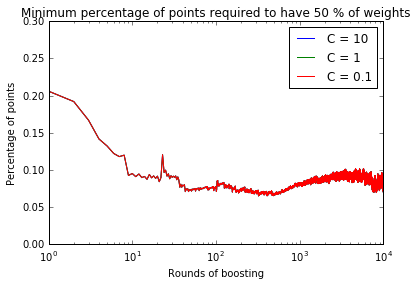

In [55]:
Ts, Percentages10, Percentages1, Percentages01 = [], [], [], []

for i in range(D.shape[0]):
    WeightsOrdered10 = -np.sort(-D10[i])
    WeightsOrdered1 = -np.sort(-D1[i])
    WeightsOrdered01 = -np.sort(-D01[i])
    
    Ts += [i]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered10:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages10 += [nb * 1.0 / D10.shape[1]]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered1:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages1 += [nb * 1.0 / D1.shape[1]]
    
    cumulWeight = 0
    nb = 0
    
    for weight in WeightsOrdered01:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Percentages01 += [nb * 1.0 / D01.shape[1]]

plt.title("Minimum percentage of points required to have 50 % of weights")
plt.xlabel("Rounds of boosting")
plt.ylabel("Percentage of points")
plt.ylim([0, 0.3])
plt.semilogx(Ts, Percentages10, label="C = 10")
plt.semilogx(Ts, Percentages10, label="C = 1")
plt.semilogx(Ts, Percentages10, label="C = 0.1")
plt.legend()

In [46]:
# Adaboost Regularized v1 (ours)
T = 10000
my_adaboost = adaboost.Adaboost(T, 3, 10, 1)
D = my_adaboost.fit(X_train, y_train)
print "Error testing : {0}".format(my_adaboost.error(X_test, y_test, T))

Error testing : 0.0585911784068


(10001, 3082)


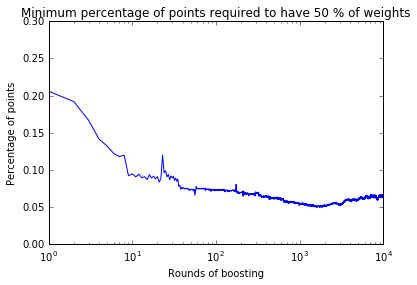

In [47]:
Ts, Percentages = [], []

print D.shape

for i in range(D.shape[0]):
    WeightsOrdered = -np.sort(-D[i])
    cumulWeight = 0
    nb = 0
    for weight in WeightsOrdered:
        cumulWeight += weight
        nb += 1
        if cumulWeight > 0.5:
            break
    
    Ts += [i]
    Percentages += [nb * 1.0 / D.shape[1]]

plt.title("Minimum percentage of points required to have 50 % of weights")
plt.xlabel("Rounds of boosting")
plt.ylabel("Percentage of points")
plt.ylim([0, 0.3])
plt.semilogx(Ts, Percentages)